In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-userbase-dataset/Netflix Userbase.csv


In [2]:
import matplotlib.pyplot as plt


df = pd.read_csv('/kaggle/input/netflix-userbase-dataset/Netflix Userbase.csv')

In [3]:
df

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [5]:
df.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df['Gender'].value_counts()

Gender
Female    1257
Male      1243
Name: count, dtype: int64

In [8]:
df['Gender'].describe()

count       2500
unique         2
top       Female
freq        1257
Name: Gender, dtype: object

In [9]:
df = df.rename(columns = {'Subscription Type': 'Sub_Type'})

<Axes: >

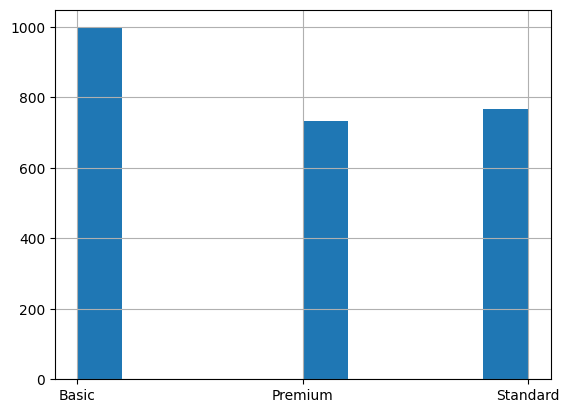

In [10]:
df['Sub_Type'].hist()

In [11]:
df['Sub_Type'].value_counts()

Sub_Type
Basic       999
Standard    768
Premium     733
Name: count, dtype: int64

In [12]:
df.columns

Index(['User ID', 'Sub_Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device',
       'Plan Duration'],
      dtype='object')

In [13]:
col = list(df.columns)
df = df[col[0:1] + [col[-1]] + col[1:9]]

In [14]:
df

,User ID,Plan Duration,Sub_Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device
0,1,1 Month,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone
1,2,1 Month,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet
2,3,1 Month,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV
3,4,1 Month,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop
4,5,1 Month,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone
...,...,...,...,...,...,...,...,...,...,...
2495,2496,1 Month,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV
2496,2497,1 Month,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV
2497,2498,1 Month,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop
2498,2499,1 Month,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet


Gender
Female    1257
Male      1243
Name: count, dtype: int64


<Axes: >

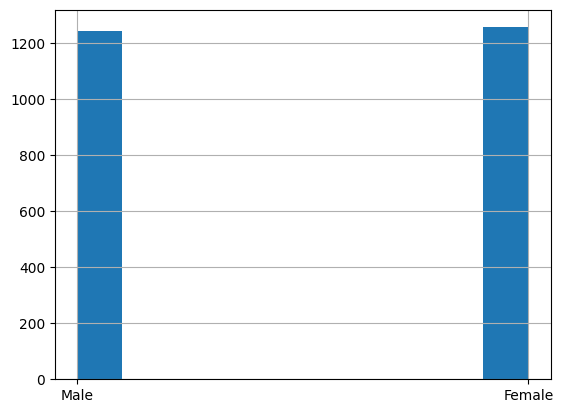

In [15]:
print(df['Gender'].value_counts())
df['Gender'].hist()

In [16]:
df.columns

Index(['User ID', 'Plan Duration', 'Sub_Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device'],
      dtype='object')

In [17]:
df = df.rename(columns={'Plan Duration': 'Plan_Dur'})

In [18]:
df.columns

Index(['User ID', 'Plan_Dur', 'Sub_Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device'],
      dtype='object')

In [19]:
ages = df['Age'].unique()

ages = sorted(ages)


In [20]:
df['Age'].value_counts()

Age
39    116
30    116
28    115
31    115
41    114
47    111
37    107
35    105
29    104
40    103
42    102
48    101
46     99
36     99
49     97
43     94
33     93
51     93
32     92
45     89
38     89
34     88
27     87
44     86
50     84
26      1
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

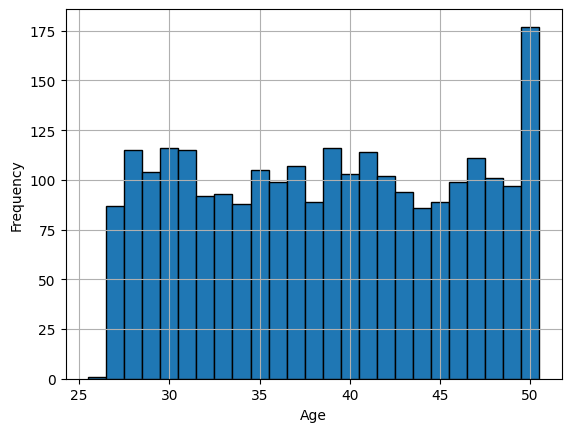

In [21]:
df['Age'].hist(bins= ages,edgecolor='black', align='left')

plt.xlabel('Age')
plt.ylabel('Frequency')

In [22]:
df.head()

,User ID,Plan_Dur,Sub_Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device
0,1,1 Month,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone
1,2,1 Month,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet
2,3,1 Month,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV
3,4,1 Month,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop
4,5,1 Month,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone


In [23]:
df['Device'].value_counts()

Device
Laptop        636
Tablet        633
Smartphone    621
Smart TV      610
Name: count, dtype: int64

<Axes: >

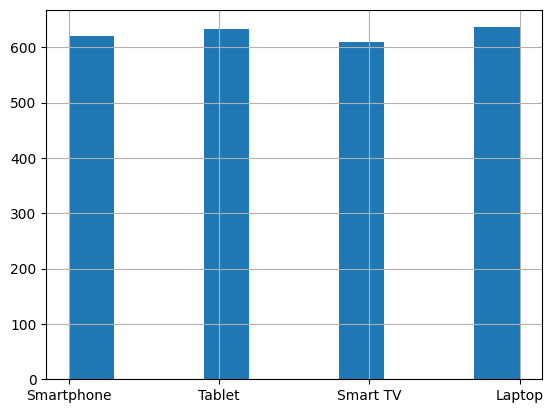

In [24]:
df['Device'].hist()

In [25]:
df.head()

,User ID,Plan_Dur,Sub_Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device
0,1,1 Month,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone
1,2,1 Month,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet
2,3,1 Month,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV
3,4,1 Month,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop
4,5,1 Month,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone


In [26]:
df = df.rename(columns={'Monthly Revenue':'Mon_Rev'})

In [27]:
df.columns

Index(['User ID', 'Plan_Dur', 'Sub_Type', 'Mon_Rev', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device'],
      dtype='object')

(array([0, 1, 2]),
 [Text(0, 0, 'Basic'), Text(1, 0, 'Premium'), Text(2, 0, 'Standard')])

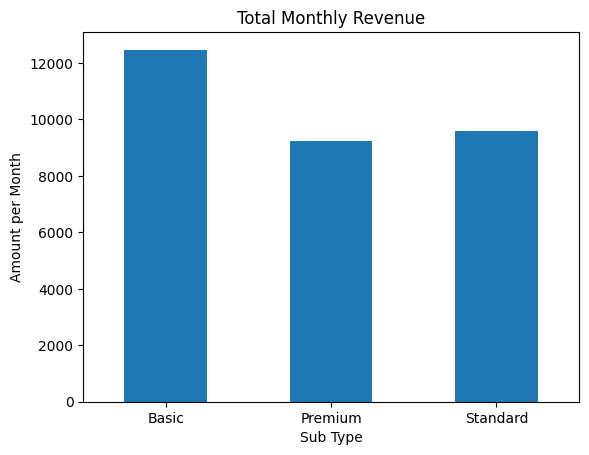

In [28]:
sub_and_Rev = df.groupby('Sub_Type')['Mon_Rev'].sum()
sub_and_Rev.plot(kind='bar')

plt.xlabel("Sub Type")
plt.ylabel("Amount per Month")
plt.title('Total Monthly Revenue')
plt.xticks(rotation=0)

In [29]:
df.head()

,User ID,Plan_Dur,Sub_Type,Mon_Rev,Join Date,Last Payment Date,Country,Age,Gender,Device
0,1,1 Month,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone
1,2,1 Month,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet
2,3,1 Month,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV
3,4,1 Month,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop
4,5,1 Month,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone


In [30]:
df['Country'].unique()

#US_Sub = df[df['Country'] =='Unit']

array(['United States', 'Canada', 'United Kingdom', 'Australia',
       'Germany', 'France', 'Brazil', 'Mexico', 'Spain', 'Italy'],
      dtype=object)

In [31]:
df['Country'].value_counts()

Country
United States     451
Spain             451
Canada            317
United Kingdom    183
Australia         183
Germany           183
France            183
Brazil            183
Mexico            183
Italy             183
Name: count, dtype: int64

In [32]:
countrys = df.groupby('Country').size()

<Axes: xlabel='Country'>

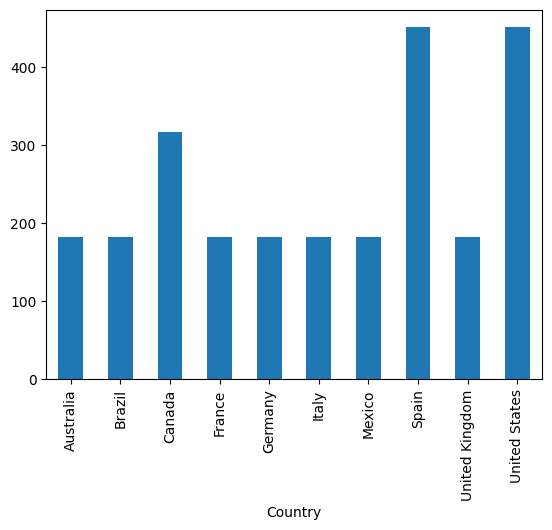

In [33]:
countrys.plot(kind='bar')

In [34]:
df.head()


,User ID,Plan_Dur,Sub_Type,Mon_Rev,Join Date,Last Payment Date,Country,Age,Gender,Device
0,1,1 Month,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone
1,2,1 Month,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet
2,3,1 Month,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV
3,4,1 Month,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop
4,5,1 Month,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone


In [35]:
#df = df.rename(columns={'Join Date': 'Join'})
df = df.rename(columns={'Join Date': 'Join'})

df.columns

Index(['User ID', 'Plan_Dur', 'Sub_Type', 'Mon_Rev', 'Join',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device'],
      dtype='object')

In [36]:
df['Join'] = pd.to_datetime(df['Join'], format= '%d-%m-%y')

In [37]:

Cust_Join = pd.DataFrame({'Year':df['Join'].dt.year,
                   'Month':df['Join'].dt.month,
                    'Day':df['Join'].dt.day,
                        'Origin': df['Country']})
Cust_Join

,Year,Month,Day,Origin
0,2022,1,15,United States
1,2021,9,5,Canada
2,2023,2,28,United Kingdom
3,2022,7,10,Australia
4,2023,5,1,Germany
...,...,...,...,...
2495,2022,7,25,Spain
2496,2022,8,4,Spain
2497,2022,8,9,United States
2498,2022,8,12,Canada


<Axes: >

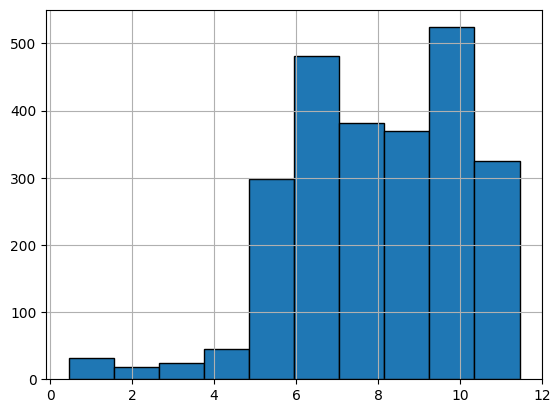

In [38]:
Cust_Join['Month'].hist(edgecolor='black', align='left') #bad example

In [39]:
month_join = Cust_Join.groupby('Month').size()
month_join

Month
1      20
2      12
3      19
4      24
5      45
6     298
7     481
8     382
9     370
10    524
11    299
12     26
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

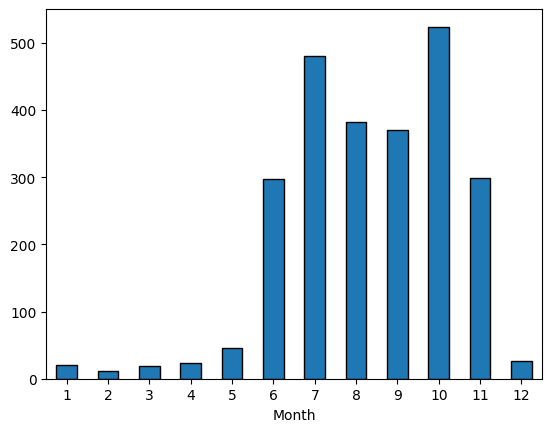

In [40]:
month_join.plot(kind='bar', edgecolor='black') # good example
plt.xticks(rotation=0)

<Axes: >

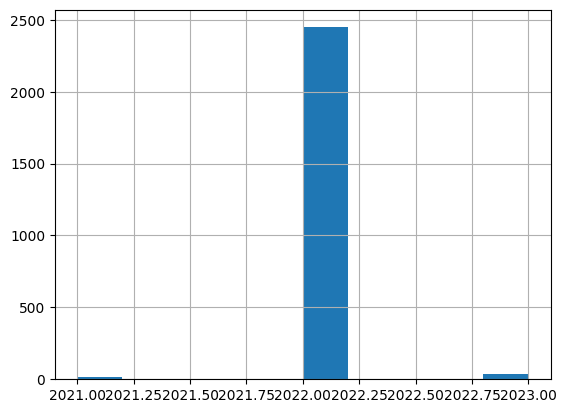

In [41]:
Cust_Join['Year'].hist() #bad example

(array([0, 1, 2]),
 [Text(0, 0, '2021'), Text(1, 0, '2022'), Text(2, 0, '2023')])

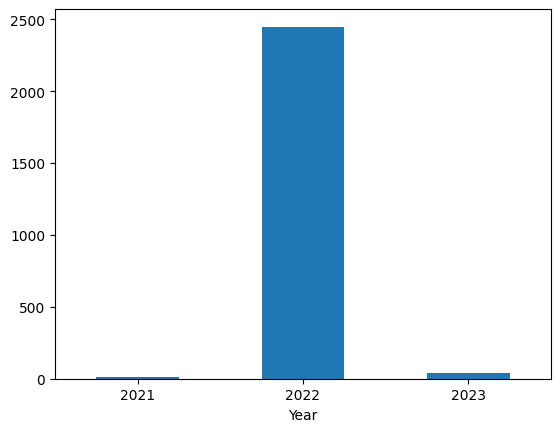

In [42]:
years = Cust_Join.groupby("Year").size() # good example
years.plot(kind='bar')

plt.xticks(rotation=0)

In [43]:
year21 = Cust_Join[Cust_Join["Year"] == 2021]
year22 = Cust_Join[Cust_Join["Year"] == 2022]
year23 = Cust_Join[Cust_Join["Year"] == 2023]

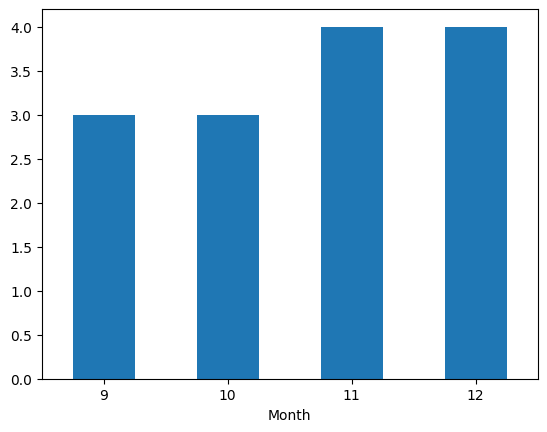

Month
9     3
10    3
11    4
12    4
dtype: int64

Total customer joined this year
14


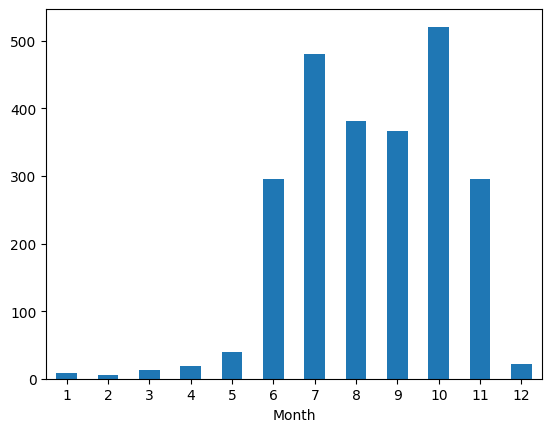

Month
1       8
2       5
3      13
4      19
5      40
6     295
7     481
8     382
9     367
10    521
11    295
12     22
dtype: int64

Total customer joined this year
2448


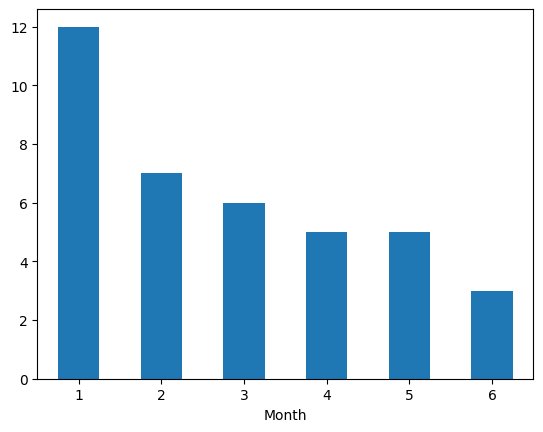

Month
1    12
2     7
3     6
4     5
5     5
6     3
dtype: int64

Total customer joined this year
38


In [44]:
year21Bar = year21.groupby('Month').size()

year21Bar.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()
print(year21Bar)
print()
print("Total customer joined this year")
print(year21.value_counts().sum())

year22Bar = year22.groupby('Month').size()
year22Bar.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()
print(year22Bar)
print()
print("Total customer joined this year")
print(year22.value_counts().sum())

year23Bar = year23.groupby('Month').size()
year23Bar.plot(kind='bar')
plt.xticks(rotation=0)
plt.show()
print(year23Bar)
print()
print("Total customer joined this year")
print(year23.value_counts().sum())

In [45]:
df.head()

,User ID,Plan_Dur,Sub_Type,Mon_Rev,Join,Last Payment Date,Country,Age,Gender,Device
0,1,1 Month,Basic,10,2022-01-15,10-06-23,United States,28,Male,Smartphone
1,2,1 Month,Premium,15,2021-09-05,22-06-23,Canada,35,Female,Tablet
2,3,1 Month,Standard,12,2023-02-28,27-06-23,United Kingdom,42,Male,Smart TV
3,4,1 Month,Standard,12,2022-07-10,26-06-23,Australia,51,Female,Laptop
4,5,1 Month,Basic,10,2023-05-01,28-06-23,Germany,33,Male,Smartphone


In [46]:
df = df.rename(columns={'Last Payment Date':'Pay_date'})
df.columns

Index(['User ID', 'Plan_Dur', 'Sub_Type', 'Mon_Rev', 'Join', 'Pay_date',
       'Country', 'Age', 'Gender', 'Device'],
      dtype='object')

In [47]:
df['Pay_date'] = pd.to_datetime(df['Pay_date'], format = '%d-%m-%y')
PayDate = pd.DataFrame({'Year': df['Pay_date'].dt.year,
                        'Month': df['Pay_date'].dt.month,
                        'Day':df['Pay_date'].dt.day,
                       'Origin':df['Country']})